In [1]:
import os
import sys
import numpy as np
import glob

module_path = os.path.abspath(os.path.join('./'))
if module_path not in sys.path:
    sys.path.append(module_path)

from melting import io
from melting.results_class import Results
from melting.util import analyze, store_results
from  matplotlib.figure import Figure
import matplotlib.pyplot as plt


In [2]:
def process_analysis(path, filename, plot=False):
    T, RFU = io.read_data(path)
    all_strands = [s for s in RFU]
    results = Results([])

    for strands in RFU:
        if '-' in strands:
            for plate in RFU[strands]:
                for duplex in RFU[strands][plate]:
                    for salt_c in RFU[strands][plate][duplex]:
                        for oligo_c in RFU[strands][plate][duplex][salt_c]:
                            analyze(strands, salt_c, oligo_c, plate, duplex, store_results, results, RFU, T, output_dir = 'results_fluo', plot=plot)
    return results

In [3]:
filename = "test_report.xlsx"
plot = False

In [4]:
analysis_res = process_analysis(os.path.join(os.getcwd(), filename), filename, plot)

### Melting Temperatures

In [13]:
print(analysis_res.sort_by_oc().print_col([i for i in range(13,30)]+[6]))

strand      oligo_c    salt_c  mod    plate    duplex         T_m_raw           T_m_vH          T_m_fit
--------  ---------  --------  -----  -------  -----------  ---------  -----  --------  ----  ---------  ----
36-38          0.50        50  I      white    dsRNA-empty      47.31   0.44     47.13  0.51      47.92  0.11
36-38          0.50        50  I      white    dsRNA            47.35   0.45     47.18  0.51      47.93  0.10
37-38          0.50        50  -      white    dsRNA-empty      56.23   0.20     55.98  0.24      57.03  0.15
37-38          0.50        50  -      white    dsRNA            56.31   0.19     56.08  0.23      57.04  0.15
39-41          0.50        50  I      white    dsRNA-empty      57.63   0.25     57.32  0.29      58.46  0.11
39-41          0.50        50  I      white    dsRNA            57.70   0.25     57.40  0.28      58.46  0.10
40-41          0.50        50  -      white    dsRNA-empty      63.91   0.13     63.46  0.14      65.79  0.20
40-41          0

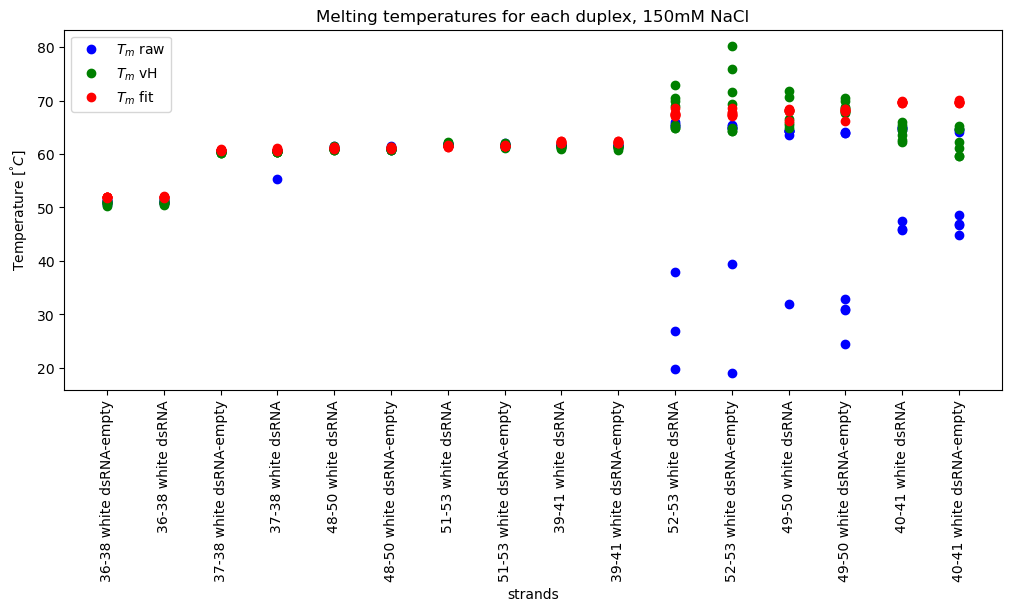

In [6]:
fig, ax = plt.subplots(constrained_layout=True, figsize = (10, 6))

analysis_res.plot_melt(ax, 0.5, 150)

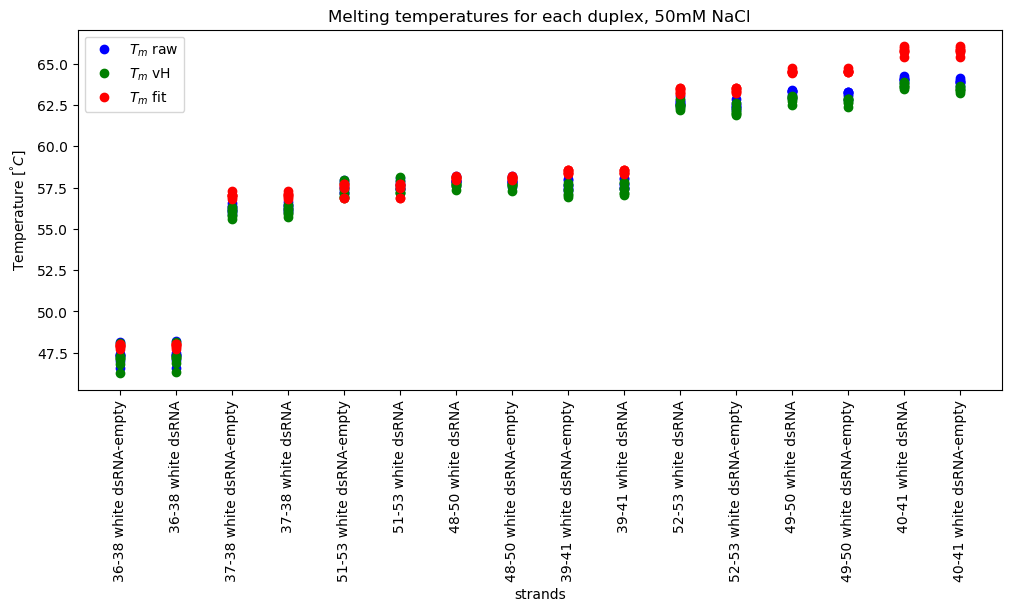

In [7]:
fig, ax = plt.subplots(constrained_layout=True, figsize = (10, 6))

analysis_res.plot_melt(ax, 0.5, 50)

### Energy parameters

In [19]:
print(analysis_res)

strand      oligo_c    salt_c  mod    plate    duplex       report      T_m_raw           T_m_vH          T_m_fit          dG_37_vH          dG_37_fit          cofold    diff cofold    dH_vH           dH_fit          dh_vrna    dS_vH          dS_fit          ds_vrna  ss
--------  ---------  --------  -----  -------  -----------  --------  ---------  -----  --------  ----  ---------  ----  ----------  ----  -----------  ----  --------  -------------  -------  -----  --------  ----  ---------  -------  ----  --------  ----  ---------  --------------------
36-38          0.50        50  I      white    dsRNA-empty                47.31   0.44     47.13  0.51      47.92  0.11      -11.91  0.12       -12.37  0.09     -8.67          -3.70   -80.42   1.02    -88.85  3.10     -81.32    -0.22  0.00     -0.25  0.01      -0.23  (((((((((..)))))))))
36-38          0.50       150  I      white    dsRNA-empty                51.04   0.27     50.81  0.29      51.97  0.09      -12.55  0.11       -13.28 

In [18]:
print(analysis_res.sort_by_strand_duplex().print_col([6,7,8,9,10,11,12,29]))

strand      oligo_c    salt_c  mod    plate    duplex         dG_37_vH          dG_37_fit          cofold    diff cofold    dH_vH           dH_fit          dh_vrna    dS_vH          dS_fit          ds_vrna
--------  ---------  --------  -----  -------  -----------  ----------  ----  -----------  ----  --------  -------------  -------  -----  --------  ----  ---------  -------  ----  --------  ----  ---------
36-38          0.50        50  I      white    dsRNA            -11.95  0.11       -12.38  0.09     -8.67          -3.71   -81.12   1.06    -88.98  3.00     -81.32    -0.22  0.00     -0.25  0.01      -0.23
36-38          0.50        50  I      white    dsRNA-empty      -11.91  0.12       -12.37  0.09     -8.67          -3.70   -80.42   1.02    -88.85  3.10     -81.32    -0.22  0.00     -0.25  0.01      -0.23
36-38          0.50       150  I      white    dsRNA            -12.62  0.11       -13.30  0.05     -9.47          -3.83   -75.78   1.29    -85.54  1.52     -82.38    -0.20  0.

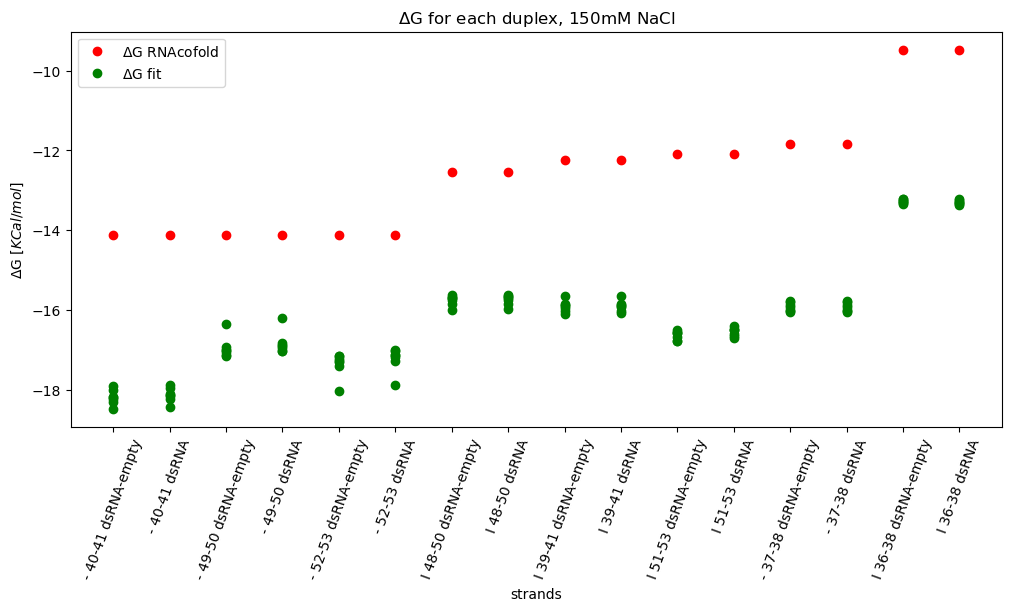

In [9]:
fig, ax = plt.subplots(constrained_layout=True, figsize = (10, 6))
analysis_res.ener_plot_dg(ax, 0.5, 150)

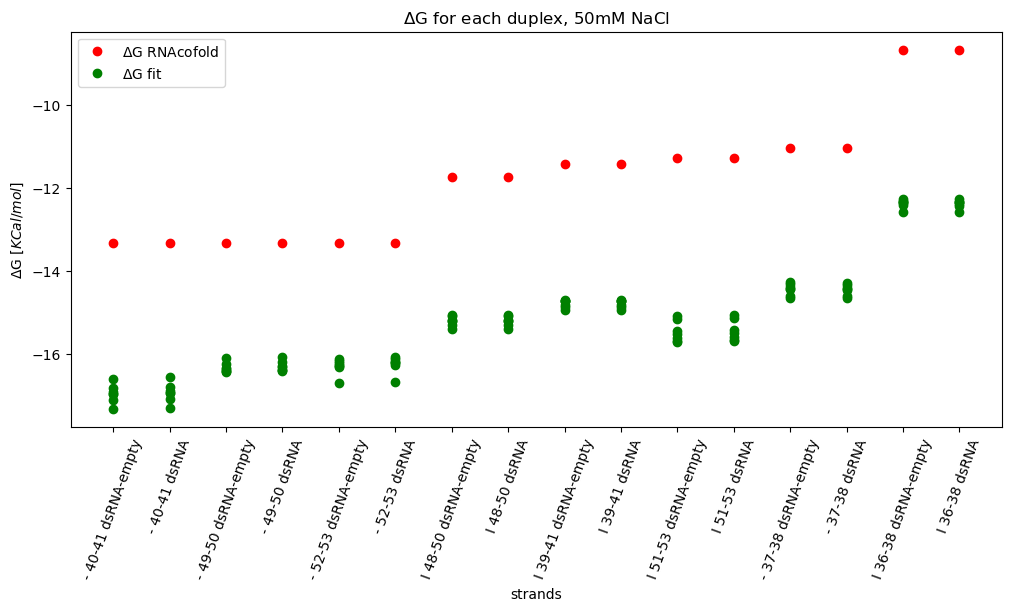

In [10]:
fig, ax = plt.subplots(constrained_layout=True, figsize = (10, 6))
analysis_res.ener_plot_dg(ax, 0.5, 50)